# Calculando a PDF e CDF considerando a metrica In-degree

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd

## Criando um DataFrame da csv obtido pelo Gephi

In [21]:
df = pd.read_csv('metrics_graph.csv')

## Criando o histograma da métrica In-degree

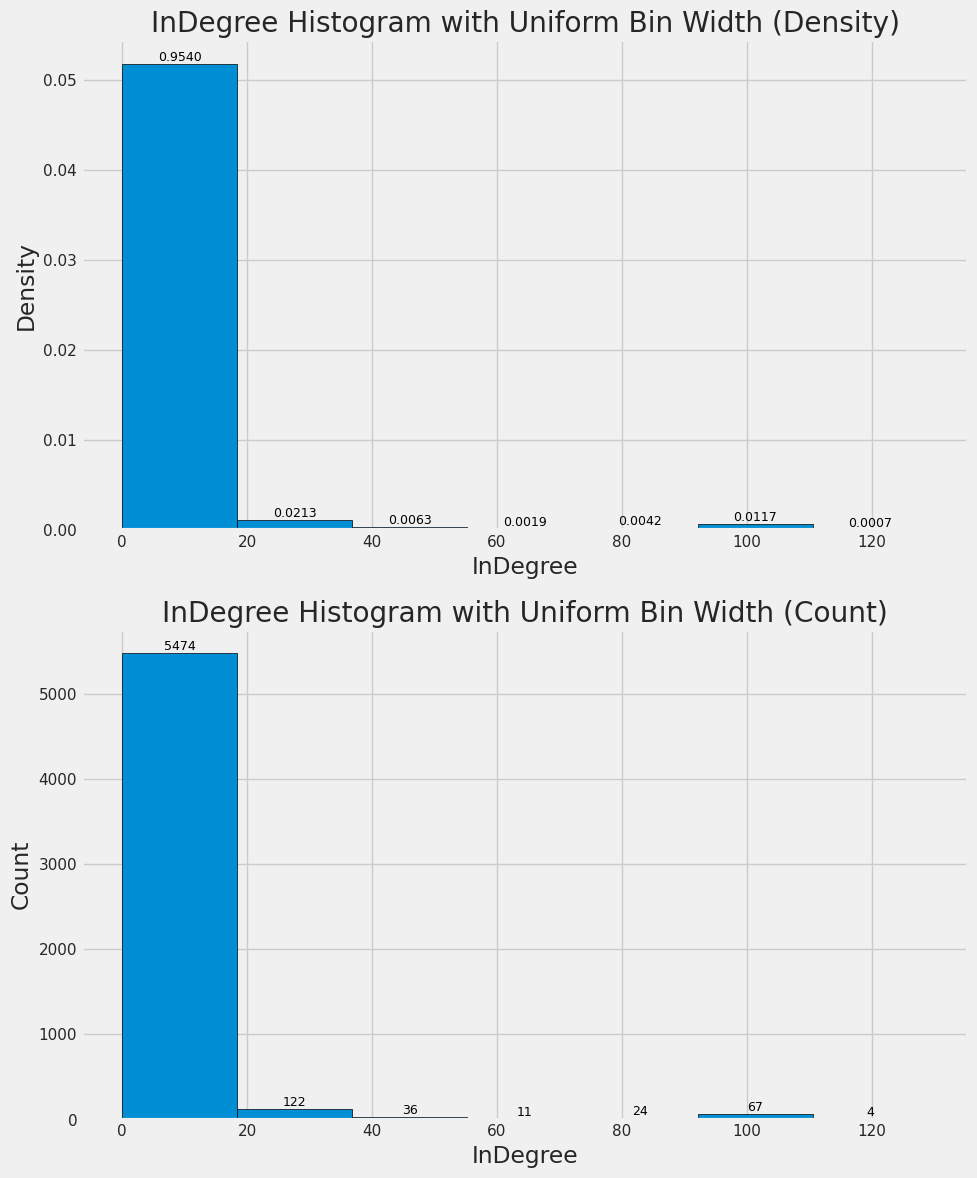

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que temos um DataFrame chamado df com a coluna 'indegree'
indegree_sequence = sorted(df['indegree'], reverse=True)

# Definir o número de bins
num_bins = 7

# Criar uma figura com dois subplots verticais
fig, ax = plt.subplots(2, 1, figsize=(10, 12))  # Aumentar o tamanho da figura

# Criar o histograma de densidade
counts, bin_edges, patches = ax[0].hist(indegree_sequence, bins=num_bins, density=True, edgecolor='black')

# Ajustar os rótulos e título para o histograma de densidade
ax[0].set_title("InDegree Histogram with Uniform Bin Width (Density)")
ax[0].set_xlabel("InDegree")
ax[0].set_ylabel("Density")

# Adicionar anotações de probabilidade no histograma de densidade
for patch in patches:
    height = patch.get_height()
    width = patch.get_x() + patch.get_width() - patch.get_x()
    x = patch.get_x()
    probability = height * width
    
    ax[0].text(
        x + width / 2,  # Posição x do texto (meio da barra)
        height,  # Posição y do texto (altura da barra)
        f'{probability:.4f}',  # Texto a ser exibido
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=9,  # Tamanho da fonte
        color='black'  # Cor do texto
    )

# Criar o histograma de contagem
counts, bin_edges, patches = ax[1].hist(indegree_sequence, bins=num_bins, density=False, edgecolor='black')

# Ajustar os rótulos e título para o histograma de contagem
ax[1].set_title("InDegree Histogram with Uniform Bin Width (Count)")
ax[1].set_xlabel("InDegree")
ax[1].set_ylabel("Count")

# Adicionar anotações de contagem no histograma de contagem
for patch in patches:
    height = patch.get_height()
    width = patch.get_x() + patch.get_width() - patch.get_x()
    x = patch.get_x()
    
    ax[1].text(
        x + width / 2,  # Posição x do texto (meio da barra)
        height,  # Posição y do texto (altura da barra)
        f'{height:.0f}',  # Texto a ser exibido
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=9,  # Tamanho da fonte
        color='black'  # Cor do texto
    )

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Desenhando a PDF no histograma

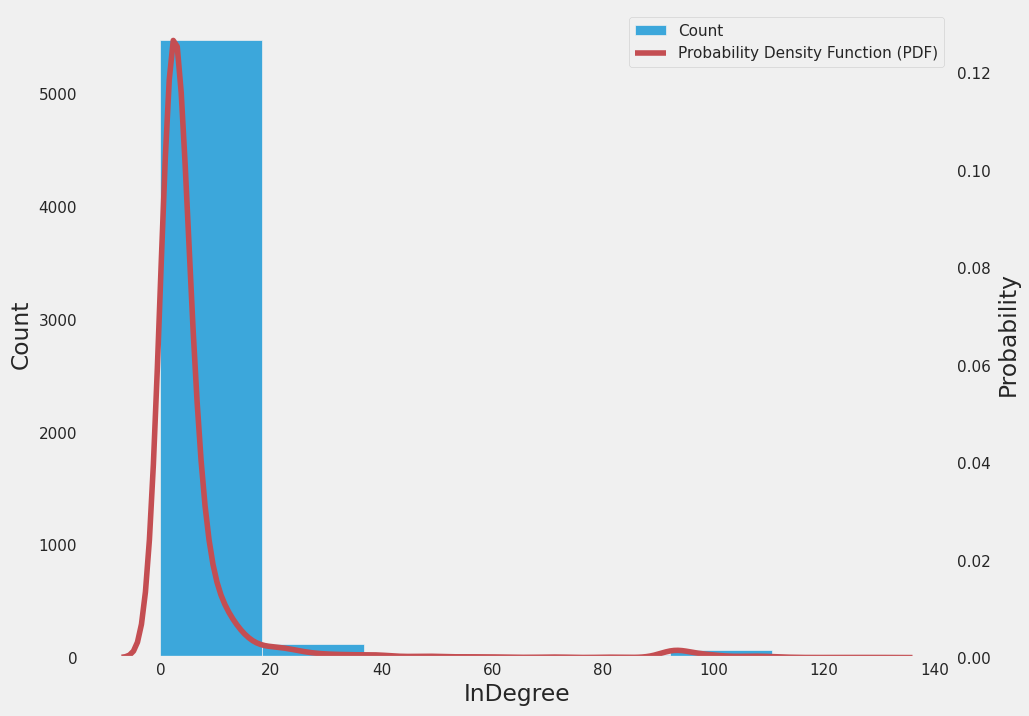

In [51]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(indegree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(indegree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("InDegree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png',dpi=600,bbox_inches="tight")
plt.show()

## Desenhando a CDF no histograma

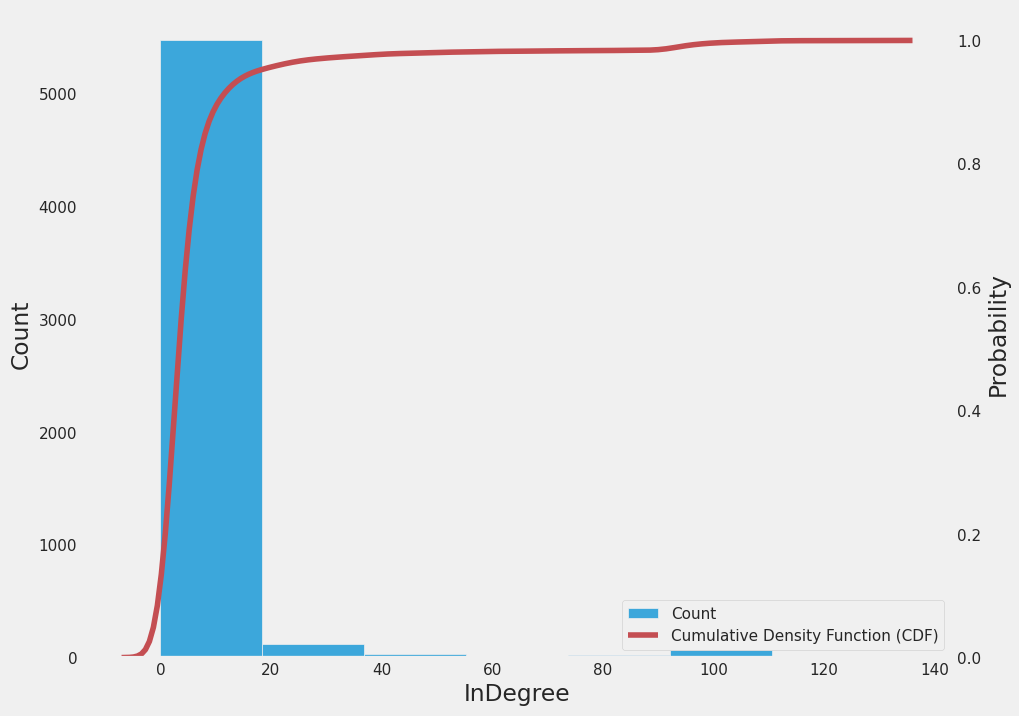

In [52]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(indegree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(indegree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("InDegree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png',dpi=600,bbox_inches="tight")
plt.show()